<a href="https://colab.research.google.com/github/MusiLintSolutions/MusiLintSolutions/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

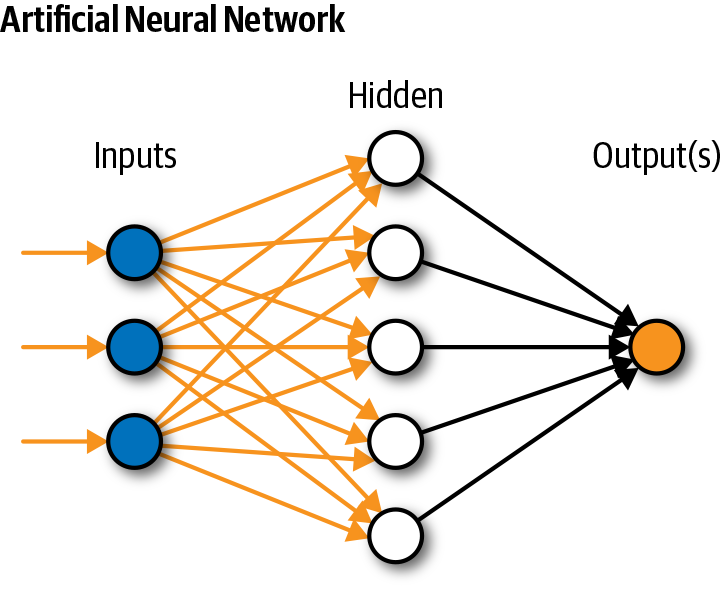




In [65]:
!pip install tensorflow-gpu

In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
dataset=pd.read_csv("Churn_Modelling.csv")

In [5]:
dataset.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [9]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [10]:
geography=pd.get_dummies(X['Geography'])

In [11]:
geography.head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [12]:
geography=pd.get_dummies(X['Geography'],drop_first=True)

In [14]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [13]:
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [20]:
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [14]:
X=X.drop(['Geography','Gender'],axis=1)

In [15]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [16]:
X=pd.concat([X,geography,gender],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

In [20]:
sc=StandardScaler()

In [21]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [22]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [23]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [24]:
X_train.shape

(8000, 11)

In [25]:
X_test.shape

(2000, 11)

In [26]:
##Part 2. Let's create ANN.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU,ELU,ReLU 
from tensorflow.keras.layers import Dropout

In [27]:
##Initialise ANN
classifier=Sequential()

In [29]:
##Add i/p layer
classifier.add(Dense(units=11,activation='relu'))

In [94]:
#Adding Ist hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [95]:
##Adding 2nd hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

In [96]:
##Adding o/p layer
classifier.add(Dense(1,activation='sigmoid'))


In [97]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [98]:
##Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [99]:
classifier.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy'] )

In [100]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 6s 8ms/step - loss: 0.4552 - accuracy: 0.7962 - val_loss: 0.3934 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.4405 - accuracy: 0.8039 - val_loss: 0.4147 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.4253 - accuracy: 0.8369 - val_loss: 0.3920 - val_accuracy: 0.8489
Epoch 4/1000
536/536 [==============================] - 4s 8ms/step - loss: 0.4285 - accuracy: 0.8408 - val_loss: 0.3898 - val_accuracy: 0.8501
Epoch 5/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.4237 - accuracy: 0.8408 - val_loss: 0.3864 - val_accuracy: 0.8432
Epoch 6/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.4276 - accuracy: 0.8321 - val_loss: 0.3877 - val_accuracy: 0.8497
Epoch 7/1000
536/536 [==============================] - 4s 8ms/step - loss: 0.4294 - accuracy: 0.8358 - val_loss: 0.3925 - val_accuracy:

In [101]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

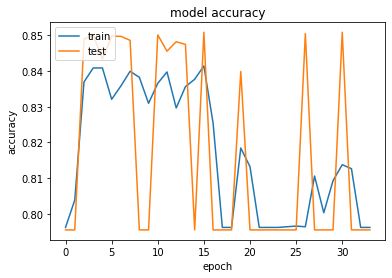

In [102]:
##Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

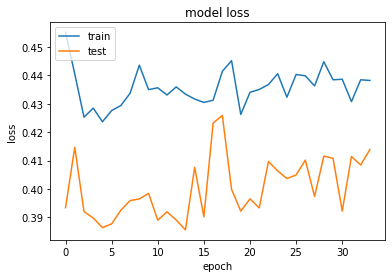

In [103]:
##Summarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [104]:
## Psrt 3 - Making Prediction and evaluating the model
## Predicting the test results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

In [105]:
## Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1595,    0],
       [ 405,    0]])

In [106]:
#Calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [109]:
score

0.7975

In [108]:
## Get the weights 
classifier.get_weights()

[array([[-0.09500559, -1.0978904 ,  0.68261874, -0.6244762 , -1.1132542 ,
          0.861055  ,  1.8583641 , -0.87698257,  0.68244636,  4.602988  ,
          0.3956771 ],
        [-7.5369353 ,  6.394694  , -6.6722217 ,  0.46572268,  0.40190795,
          6.3217216 , -2.2166867 , -8.788635  , -8.641941  , -0.29215083,
          2.3735971 ],
        [ 2.839621  ,  0.94615227, -0.11957944,  0.3619298 , -0.5327284 ,
         -0.0257119 ,  1.182059  ,  0.3436215 , -1.0540841 , -2.2083812 ,
         -1.2385911 ],
        [ 1.2253399 ,  0.4415993 , -1.3174208 , -9.046245  ,  2.783058  ,
          2.1369512 , -8.158484  ,  0.8952952 , -2.8802404 , -4.687975  ,
          0.65016496],
        [-0.25355676,  0.2379493 , -2.07215   , -9.324294  , -9.185816  ,
         -1.39024   , -0.65907735, -1.9982233 , -0.42616636,  1.3352351 ,
          8.589951  ],
        [ 3.6109202 ,  0.47337604, -0.16713855,  0.21358123, -1.005912  ,
         -0.760798  , -1.7818702 , -1.684925  ,  1.7421212 ,  0.9403497